# Predicting Real Estate Prices in Boston
## A linear regression-based analysis

### In the Project below we are trying to build a model that will help us with predicting our target `MEDV` variable which is median value of owner homes in $ 1000

## 1. Understand the Dataset Variables
The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Each record in the dataset describes a Boston suburb or town.

The attributes are deﬁned as follows:

1. **CRIM** – per capita crime rate by town
2. **ZN** – proportion of residential land zoned for lots over 25,000 sq. ft.
3. **INDUS** – proportion of non-retail business acres per town
4. **CHAS** – Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. **NOX** – nitric oxides concentration (parts per 10 million)
6. **RM** – average number of rooms per dwelling
7. **AGE** – proportion of owner-occupied units built prior to 1940
8. **DIS** – weighted distances to five Boston employment centers
9. **RAD** – index of accessibility to radial highways
10. **TAX** – full-value property-tax rate per \$10,000
11. **PTRATIO** – pupil-teacher ratio by town
12. **B** – $1000(Bk - 0.63)^2$ where $Bk$ is the proportion of African American residents by town 
13. **LSTAT** – percentage of lower status of the population

Target Variable:

* **MEDV** – Median value of owner-occupied homes in \$1000s


## 2. Exploratory Data Analysis (EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("whitegrid")

In [3]:
df = pd.read_csv('housing.csv')
df_clean = df.copy()

In [4]:
df.sample(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
352,0.07244,60.0,1.69,0,0.411,5.884,18.5,10.7103,4,411.0,18.3,392.33,7.79,18.6
193,0.02187,60.0,2.93,0,0.401,6.800,9.9,6.2196,1,265.0,15.6,393.37,5.03,31.1
77,0.08707,0.0,12.83,0,0.437,6.140,45.8,4.0905,5,398.0,18.7,386.96,10.27,20.8
402,9.59571,0.0,18.10,0,0.693,6.404,100.0,1.6390,24,666.0,20.2,376.11,20.31,12.1
105,0.13262,0.0,8.56,0,0.520,5.851,96.7,2.1069,5,384.0,20.9,394.05,16.47,19.5
350,0.06211,40.0,1.25,0,0.429,6.490,44.4,8.7921,1,335.0,19.7,396.90,5.98,22.9
450,6.71772,0.0,18.10,0,0.713,6.749,92.6,2.3236,24,666.0,20.2,0.32,17.44,13.4
277,0.06127,40.0,6.41,1,0.447,6.826,27.6,4.8628,4,254.0,17.6,393.45,4.16,33.1
226,0.38214,0.0,6.20,0,0.504,8.040,86.5,3.2157,8,307.0,17.4,387.38,3.13,37.6
133,0.32982,0.0,21.89,0,0.624,5.822,95.4,2.4699,4,437.0,21.2,388.69,15.03,18.4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
print(f'Data Frame rows: {df_clean.shape[0]}')
print(f'Data Frame columns: {df_clean.shape[1]}')
print(f'Number of duplicated rows: {df_clean.duplicated().sum()}')
print(f'Number of missing data: {df_clean.isnull().sum().sum()}')

Data Frame rows: 506
Data Frame columns: 14
Number of duplicated rows: 0
Number of missing data: 0


In [8]:
df['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

As we can see our data is already looking good, no duplicated rows and no missing values

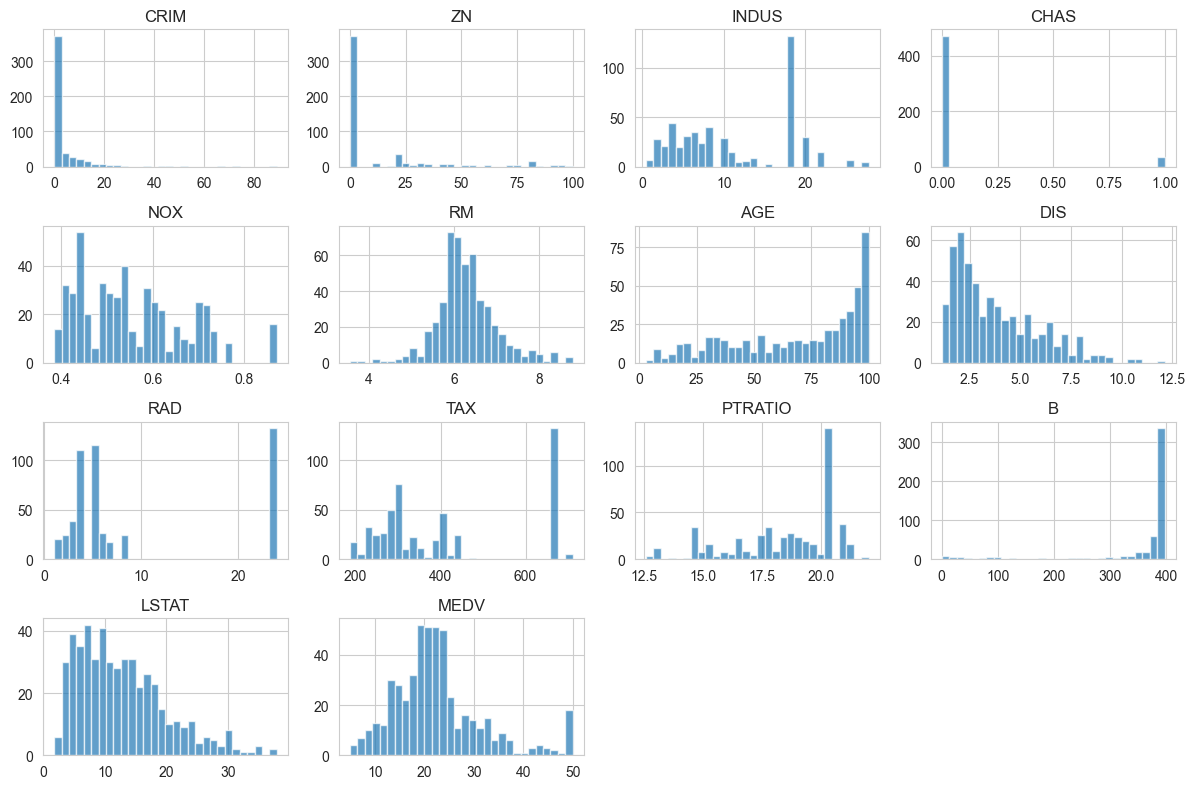

In [9]:
df.hist(figsize=(12,8), bins=30, alpha=0.7)
plt.tight_layout()

We can see that most of the variables are skewed

In [10]:
skewness = df.skew()
skewness

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
MEDV       1.108098
dtype: float64

In [11]:
df.corr()['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

<Axes: >

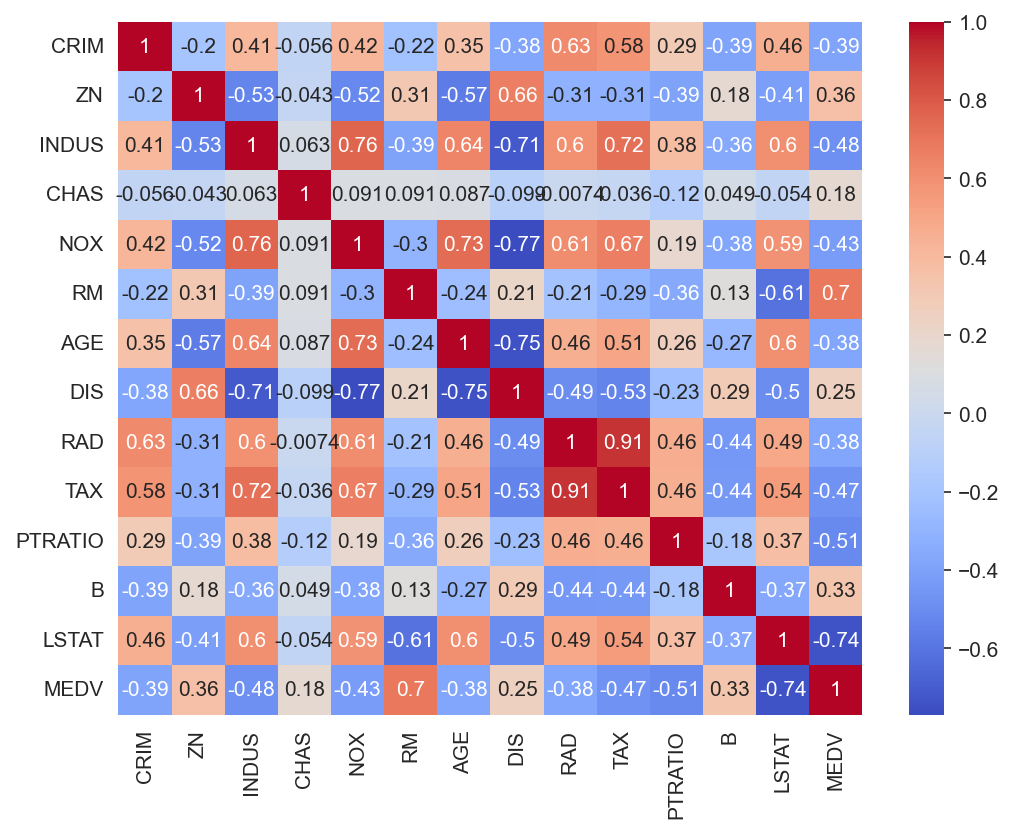

In [12]:
plt.figure(figsize=(8,6), dpi=150)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

## 3. Data Cleaning

In [13]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [14]:
num_attribs = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV']
cat_attribs = ['CHAS']

In [15]:
df_clean = pd.get_dummies(df_clean, columns=cat_attribs, drop_first=True)

In [16]:
# transforming variables

skewness = skewness[num_attribs]
skewness

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
MEDV       1.108098
dtype: float64

In [17]:
right_skewed = list(skewness[skewness >= 2].index)
left_skewed = list(skewness[skewness < -0.6].index)

In [18]:
right_skewed

['CRIM', 'ZN']

In [19]:
left_skewed

['PTRATIO', 'B']

In [20]:
df_clean[right_skewed] = np.log1p(df_clean[right_skewed])

### Before vs after transformation of positively skeved data

In [21]:
df[right_skewed].skew()

CRIM    5.223149
ZN      2.225666
dtype: float64

In [22]:
df_clean[right_skewed].skew()

CRIM    1.269201
ZN      1.193451
dtype: float64

In [23]:
df_clean['PTRATIO'] = np.log1p(df_clean['PTRATIO'].max() - df_clean['PTRATIO'])
df_clean['B'] = np.log1p(df_clean['B'].max() - df_clean['B'])

### Before vs after transformation of negatively skewed data

In [24]:
df[left_skewed].skew()

PTRATIO   -0.802325
B         -2.890374
dtype: float64

In [25]:
df_clean[left_skewed].skew()

PTRATIO    0.070092
B          0.601359
dtype: float64

### Detecting outliers

In [26]:
def show_outliers():
    results = []

    for col in num_attribs:
        q1 = df_clean[col].quantile(0.25)
        q3 = df_clean[col].quantile(0.75)
        iqr = q3 - q1

        # standard treshold Q3 + 1.5 * IQR
        treshold = q3 + 1.5 * iqr
        outliers = (df_clean[col] > treshold).sum()

        proportion = (outliers / len(df_clean)) * 100

        results.append([
            col,
            outliers,
            f'{proportion:.2f}%'
        ])

    outliers_df = pd.DataFrame(data=results, columns=[
        'Column',
        'Number of Outliers',
        '%'
    ])

    return outliers_df

In [27]:
show_outliers()

,Column,Number of Outliers,%
0,CRIM,6,1.19%
1,ZN,0,0.00%
2,INDUS,0,0.00%
3,NOX,0,0.00%
4,RM,22,4.35%
5,AGE,0,0.00%
6,DIS,5,0.99%
7,RAD,0,0.00%
8,TAX,0,0.00%
9,PTRATIO,0,0.00%


In [28]:
def winsorize_series(s, lower=0.01, upper=0.99):
    return s.clip(lower=s.quantile(lower), upper=s.quantile(upper))

outlier_cols = ['CRIM', 'RM', 'DIS', 'LSTAT', 'MEDV']
for col in outlier_cols:
    df_clean[col] = winsorize_series(df_clean[col])

In [29]:
q1 = df_clean['MEDV'].quantile(0.25)
q3 = df_clean['MEDV'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

len(df_clean[(df_clean['MEDV'] < lower_bound) | (df_clean['MEDV'] > upper_bound)])

38

In [30]:
# df_clean[(df_clean['MEDV'] < lower_bound) | (df_clean['MEDV'] > upper_bound)]

In [31]:
# df_clean = df_clean[(df_clean['MEDV'] >= lower_bound) & (df_clean['MEDV'] <= upper_bound)]

In [30]:
show_outliers()

,Column,Number of Outliers,%
0,CRIM,6,1.19%
1,ZN,0,0.00%
2,INDUS,0,0.00%
3,NOX,0,0.00%
4,RM,22,4.35%
5,AGE,0,0.00%
6,DIS,0,0.00%
7,RAD,0,0.00%
8,TAX,0,0.00%
9,PTRATIO,0,0.00%


<Axes: >

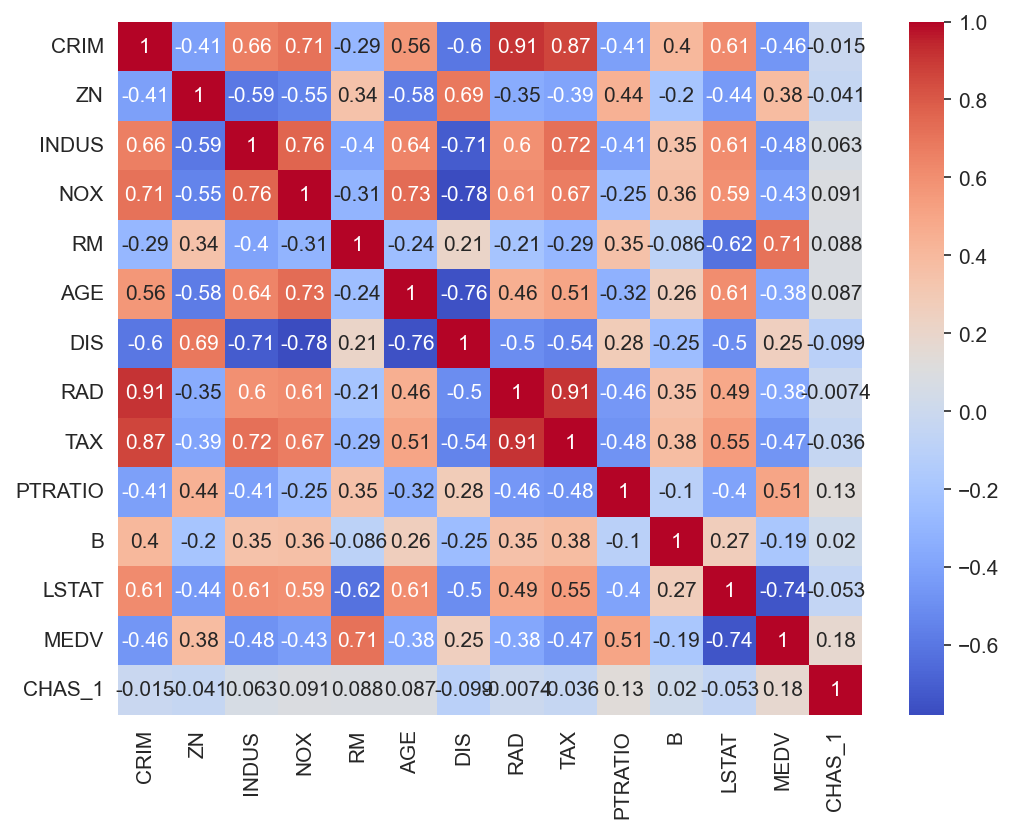

In [31]:
plt.figure(figsize=(8,6),dpi=150)
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm')

In [32]:
df_clean.corr()['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.711350
PTRATIO    0.506343
ZN         0.384136
DIS        0.254691
CHAS_1     0.175314
B         -0.185703
AGE       -0.376485
RAD       -0.380330
NOX       -0.426749
CRIM      -0.461698
TAX       -0.467613
INDUS     -0.483520
LSTAT     -0.738335
Name: MEDV, dtype: float64

In [33]:
df_clean.corr()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CHAS_1
CRIM,1.000000,-0.413643,0.664711,0.712662,-0.290013,0.562717,-0.598192,0.909729,0.865322,-0.412308,0.403149,0.612848,-0.461698,-0.015492
ZN,-0.413643,1.000000,-0.593145,-0.547900,0.342135,-0.577424,0.692702,-0.351745,-0.392140,0.437992,-0.195278,-0.441344,0.384136,-0.041368
INDUS,0.664711,-0.593145,1.000000,0.763651,-0.397117,0.644779,-0.714873,0.595129,0.720760,-0.414956,0.345994,0.607220,-0.483520,0.062938
NOX,0.712662,-0.547900,0.763651,1.000000,-0.307200,0.731470,-0.778621,0.611441,0.668023,-0.254443,0.359953,0.593863,-0.426749,0.091203
RM,-0.290013,0.342135,-0.397117,-0.307200,1.000000,-0.243882,0.212262,-0.206025,-0.291058,0.349540,-0.086004,-0.624187,0.711350,0.087879
AGE,0.562717,-0.577424,0.644779,0.731470,-0.243882,1.000000,-0.755049,0.456022,0.506456,-0.323710,0.259006,0.605316,-0.376485,0.086518
DIS,-0.598192,0.692702,-0.714873,-0.778621,0.212262,-0.755049,1.000000,-0.502005,-0.543090,0.279407,-0.253358,-0.503890,0.254691,-0.099236
RAD,0.909729,-0.351745,0.595129,0.611441,-0.206025,0.456022,-0.502005,1.000000,0.910228,-0.455067,0.353171,0.488911,-0.380330,-0.007368
TAX,0.865322,-0.392140,0.720760,0.668023,-0.291058,0.506456,-0.543090,0.910228,1.000000,-0.478946,0.375685,0.545151,-0.467613,-0.035587
PTRATIO,-0.412308,0.437992,-0.414956,-0.254443,0.349540,-0.323710,0.279407,-0.455067,-0.478946,1.000000,-0.100921,-0.396524,0.506343,0.131708


From the correlation analysis we can see that `MEDV` is strongly corelated to `RM` - average number of rooms per dwelling , `LSTAT` - percentage of lower status of the population

In [34]:
df_clean.corr()['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.711350
PTRATIO    0.506343
ZN         0.384136
DIS        0.254691
CHAS_1     0.175314
B         -0.185703
AGE       -0.376485
RAD       -0.380330
NOX       -0.426749
CRIM      -0.461698
TAX       -0.467613
INDUS     -0.483520
LSTAT     -0.738335
Name: MEDV, dtype: float64

<Axes: >

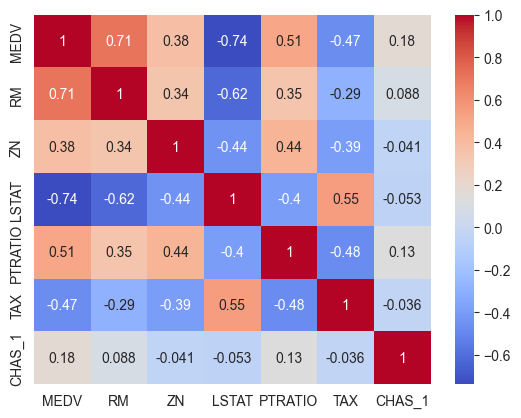

In [35]:
sns.heatmap(df_clean[['MEDV','RM', 'ZN', 'LSTAT','PTRATIO', 'TAX', 'CHAS_1']].corr(), annot=True, cmap='coolwarm')


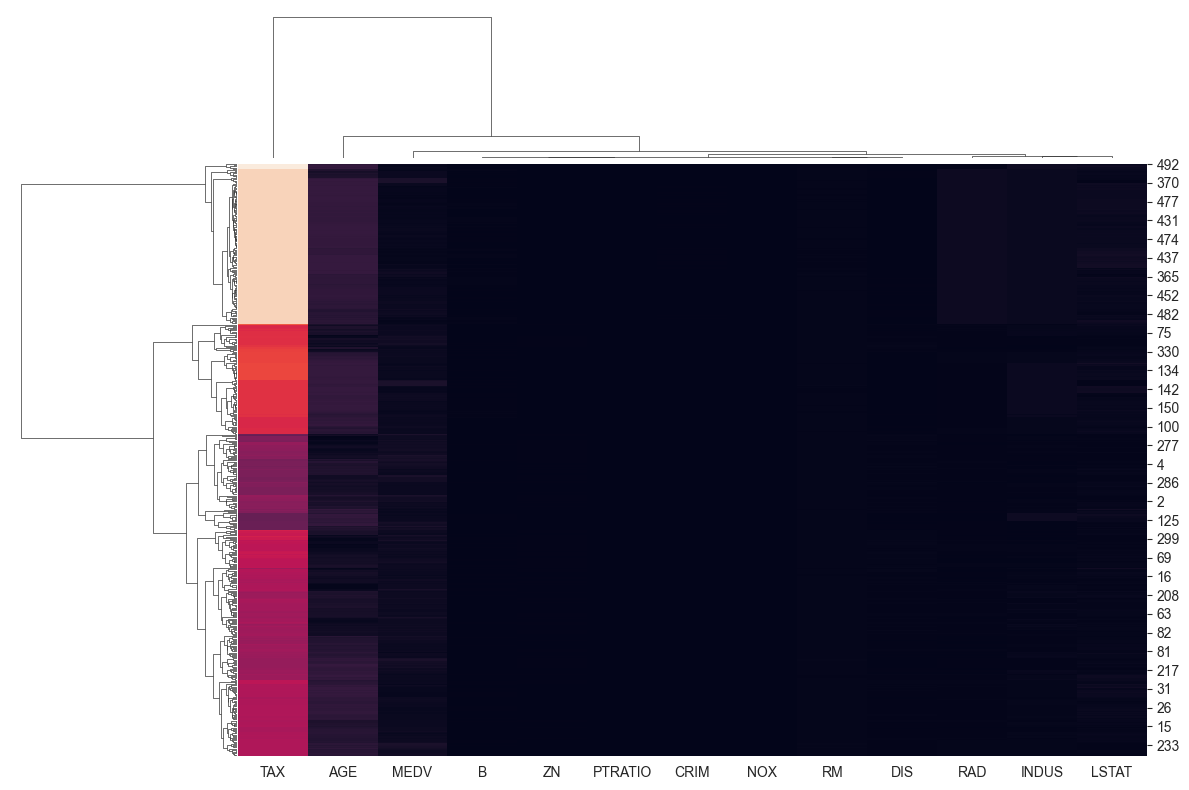

In [36]:
sns.clustermap(data=df_clean[df_clean.columns[:-1]], figsize=(12,8), cbar_pos=None);

## 4. Model Building

In [37]:
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.tsaplots import plot_acf

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error, mean_squared_error

### Linear Regression Model

In [39]:
df_clean.columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'CHAS_1'],
      dtype='object')

In [40]:
df_clean['MEDV'].mean()

np.float64(22.544980237154153)

In [41]:
X = df_clean[['RM', 'ZN', 'LSTAT','PTRATIO', 'CHAS_1']]
y = df_clean['MEDV']

In [42]:
from sklearn.pipeline import Pipeline

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [45]:
scaled_X_train.shape

(354, 5)

In [46]:
scaled_X_test.shape

(152, 5)

In [47]:
def make_model(model, X_train=scaled_X_train, X_test=scaled_X_test, y_train=y_train, y_test=y_test):
    '''train the linear model and print metrics'''

    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_mae = mean_absolute_error(y_train, train_pred)
    test_mae = mean_absolute_error(y_test, test_pred)

    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)

    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)

    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)
    
    print("Model Evaluation Results:\n")
    print(f"Train MAE:  {train_mae:.4f}")
    print(f"Test MAE:   {test_mae:.4f}")
    print(f"Train MSE:  {train_mse:.4f}")
    print(f"Test MSE:   {test_mse:.4f}")
    print(f"Train RMSE: {train_rmse:.4f}")
    print(f"Test RMSE:  {test_rmse:.4f}")
    print(f"Train R²:   {train_r2:.4f}")
    print(f"Test R²:    {test_r2:.4f}")

    return test_pred

In [48]:
def check_assumptions(X_test, y_test, predictions):
    '''checks the linear regression assumptions'''
    residuals = y_test - predictions

    shapiro_stat, shapiro_p_value = stats.shapiro(residuals)
    print(f'Shapiro-Wilk Test: Statistic = {shapiro_stat:.4f}, P-value = {shapiro_p_value:.4f}')
    if shapiro_p_value < 0.05:
        print("Reject the null hypothesis: residuals are not normally distributed.")
    else:
        print("Fail to reject the null hypothesis: residuals appear normally distributed.")

    X_test_with_const = sm.add_constant(X_test)
    _, bp_p_value, _, _ = het_breuschpagan(residuals, X_test_with_const)
    print(f'\nBreusch-Pagan Test: P-value = {bp_p_value:.6f}')
    if bp_p_value < 0.05:
        print("Reject the null hypothesis: heteroscedasticity detected.")
    else:
        print("Fail to reject the null hypothesis: residuals appear homoscedastic.")

    dw_statistic = sm.stats.durbin_watson(residuals)
    print(f'\nDurbin-Watson Statistic: {dw_statistic:.4f}')
    if dw_statistic < 1.5 or dw_statistic > 2.5:
        print("Possible autocorrelation in residuals.")
    else:
        print("No significant autocorrelation in residuals.")

    fig, axes = plt.subplots(2, 2, figsize=(15, 12), dpi=150)

    sns.histplot(residuals, kde=True, bins=30, color='gray', alpha=0.7, ax=axes[0, 0])
    axes[0, 0].set_title('Histogram of Residuals')
    axes[0, 0].set_xlabel('Residuals')
    axes[0, 0].set_ylabel('Frequency')

    stats.probplot(residuals, dist="norm", plot=axes[0, 1])
    axes[0, 1].get_lines()[0].set_color('gray')
    axes[0, 1].get_lines()[1].set_markerfacecolor('gray')
    axes[0, 1].get_lines()[1].set_markeredgecolor('gray')
    axes[0, 1].set_title("Q-Q Plot of Residuals")

    axes[1, 0].scatter(predictions, residuals, color='gray', alpha=0.7)
    axes[1, 0].axhline(0, color='red', linestyle='--')
    axes[1, 0].set_title('Residuals vs. Predicted Values')
    axes[1, 0].set_xlabel('Predicted Values')
    axes[1, 0].set_ylabel('Residuals')

    axes[1, 1].scatter(y_test, predictions, color='gray', alpha=0.6)
    axes[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    axes[1, 1].set_title(f'Actual vs. Predicted Values')
    axes[1, 1].set_xlabel("Actual Values")
    axes[1, 1].set_ylabel("Predicted Values")

    plt.tight_layout()
    plt.show()

In [49]:
lr = LinearRegression()
pred = make_model(lr)

Model Evaluation Results:

Train MAE:  3.6677
Test MAE:   3.4825
Train MSE:  26.0126
Test MSE:   25.6246
Train RMSE: 5.1003
Test RMSE:  5.0621
Train R²:   0.7027
Test R²:    0.6542


Shapiro-Wilk Test: Statistic = 0.8867, P-value = 0.0000
Reject the null hypothesis: residuals are not normally distributed.

Breusch-Pagan Test: P-value = 0.792043
Fail to reject the null hypothesis: residuals appear homoscedastic.

Durbin-Watson Statistic: 1.9400
No significant autocorrelation in residuals.


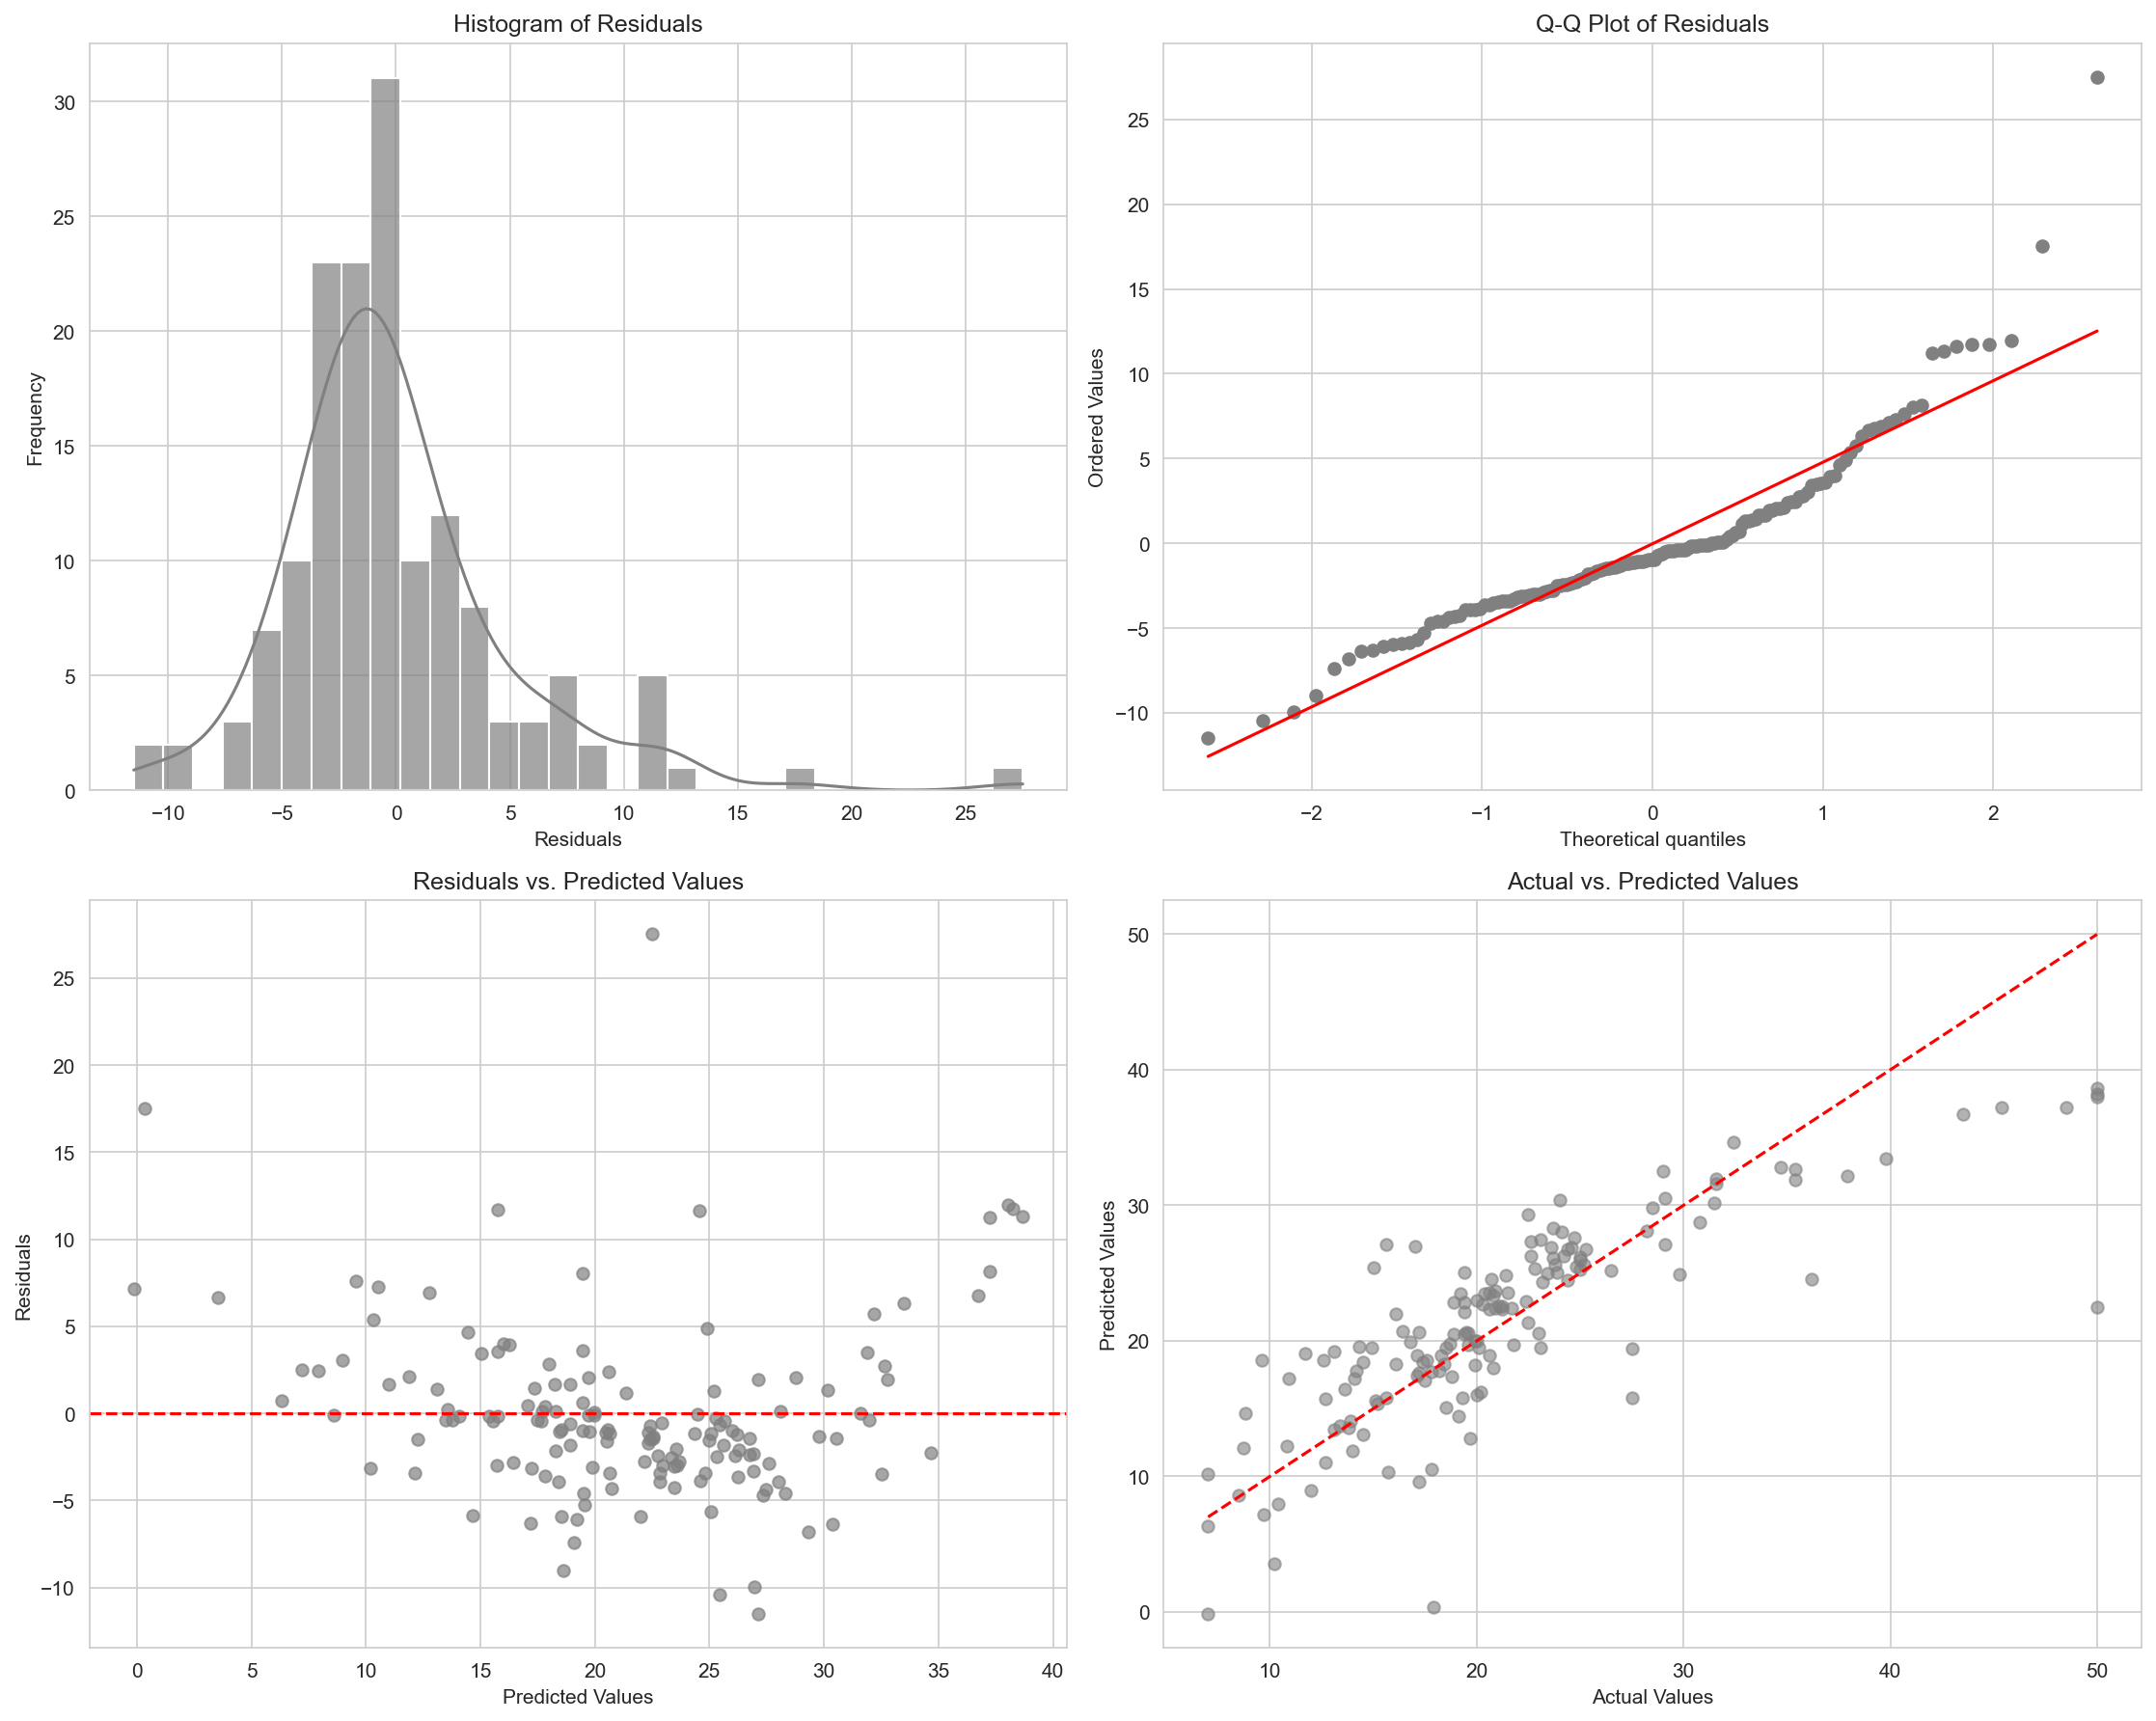

In [50]:
check_assumptions(scaled_X_test, y_test,pred)

### Decision Tree Regressor

In [51]:
from sklearn.tree import DecisionTreeRegressor

In [52]:
tree_reg = DecisionTreeRegressor(max_depth=6, random_state=44)
tree_reg_pred = make_model(tree_reg)

Model Evaluation Results:

Train MAE:  1.7628
Test MAE:   2.8365
Train MSE:  7.0531
Test MSE:   20.5693
Train RMSE: 2.6558
Test RMSE:  4.5353
Train R²:   0.9194
Test R²:    0.7224


### Random Forrest Regressor

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
rf = RandomForestRegressor(max_depth=5)
rf_pred = make_model(rf)

Model Evaluation Results:

Train MAE:  1.9907
Test MAE:   2.5109
Train MSE:  7.2123
Test MSE:   15.7173
Train RMSE: 2.6856
Test RMSE:  3.9645
Train R²:   0.9176
Test R²:    0.7879


### Support Vector Machine Regressor

In [55]:
from sklearn.svm import SVR

tree = SVR()
preds = make_model(tree)

Model Evaluation Results:

Train MAE:  3.1944
Test MAE:   2.8863
Train MSE:  27.0429
Test MSE:   21.2130
Train RMSE: 5.2003
Test RMSE:  4.6058
Train R²:   0.6910
Test R²:    0.7137


## 5. Tunning

In [57]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV

In [58]:
full_X = df_clean.drop('MEDV', axis=1)
full_y = df_clean['MEDV']
X_train, X_test, y_train, y_test = train_test_split(full_X, full_y, test_size=0.3, random_state=42)
scaler = StandardScaler()

full_X_train_scaled = scaler.fit_transform(X_train)
full_X_test_scaled = scaler.transform(X_test)

In [59]:
def tune(model, param_grid, X_train=full_X_train_scaled, X_test=full_X_test_scaled, y_train=y_train, y_test=y_test):
    grid = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid.fit(X_train, y_train)

    preds = grid.predict(X_test)

    print(grid.best_estimator_)
    print('Best Score:', grid.best_score_)
    print('\n')

    return preds

In [60]:
lasso = Lasso()
lasso_grid = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1]}


ridge = Ridge()
ridge_grid = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1]}

elastic_net = ElasticNet()
elastic_grid = {
    'alpha': [0.001, 0.01, 0.1, 1],
    'l1_ratio': [0.1, 0.5, 0.9]
}

svr = SVR()
svr_grid = {
    'kernel': ['rbf', 'linear'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5]
}

rf = RandomForestRegressor()
rf_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [61]:
models = {lasso:lasso_grid,
          ridge:ridge_grid,
          elastic_net:elastic_grid,
          svr:svr_grid,
          rf:rf_grid}

for model, grid in models.items():
    tune(model, grid)

Lasso(alpha=0.1)
Best Score: 0.6745750874445993


Ridge(alpha=1)
Best Score: 0.6741465763509016


ElasticNet(alpha=0.1, l1_ratio=0.1)
Best Score: 0.6780174690286104


SVR(C=10)
Best Score: 0.8124384535981737


RandomForestRegressor(min_samples_split=5)
Best Score: 0.8185658533872904




In [62]:
svr_final = SVR(C=10)
svr_final_pred = make_model(svr_final,X_train=full_X_train_scaled, X_test=full_X_test_scaled, y_train=y_train, y_test=y_test)
print('\n')

Model Evaluation Results:

Train MAE:  1.6154
Test MAE:   1.9550
Train MSE:  8.7950
Test MSE:   11.6006
Train RMSE: 2.9656
Test RMSE:  3.4060
Train R²:   0.8995
Test R²:    0.8435




In [64]:
rf_final = RandomForestRegressor(min_samples_split=5)

rf_final_pred = make_model(rf_final,X_train=full_X_train_scaled, X_test=full_X_test_scaled, y_train=y_train, y_test=y_test)
print('\n')

Model Evaluation Results:

Train MAE:  1.0821
Test MAE:   2.1195
Train MSE:  2.8474
Test MSE:   9.6687
Train RMSE: 1.6874
Test RMSE:  3.1094
Train R²:   0.9675
Test R²:    0.8695


